# Object evaluation
This code objective is to find the words associated to the pictures that best describe the photo and predict likes.  
Steps:
1. Translate the words into a ngram list 
1. Try 1 to 3 words in the ngram - decide what is the best to use for the model.
1. Create a vectorization of the words to translate those to a matrix, use both TfidfVectorizer, and CountVectorizer. 
1. Use the cosine distince to find the words that relate most to the picture, but have a low correlation to each other.  We want to find words that are distinct to a picuture, but is enough to be able to show what caused the like of the picture. 
1. Add the max cosine and words to the pickle dataset that has been created by the tensorflow model.
1. Find the 2nd and 3rd quadrant of likes (ignoring all pictures that have the max or min amount of likes)
1. Train the model on 80% of the data, leaving 20% to validate
1. Predict the amount of likes for the bag of words (cosine values)
1. Validate the variablilty of the model and document what our findings are.

Imports

In [118]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import spatial
from pandasql import *

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances



Read the pickle database to get the columns for the object descriptions

In [94]:
df = pd.read_pickle('instagram_database.pickle')
#df.head()

df[['caption', 'image_caption', 'likes']]

Get the image_caption into a list, to be used with the NLP code.

In [95]:
object_words= df['image_caption'].tolist()
#object_words

# ngram = 1
max feature = 1000

In [96]:
vect = CountVectorizer(stop_words="english", analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=1000)
X = vect.fit_transform(object_words)

In [97]:
count_df = DataFrame(X.A, columns=vect.get_feature_names())
#print (count_df)

In [98]:
count_ary = count_df.values
#print (count_ary)
correlation= 1-pairwise_distances(count_ary, metric='cosine')
#print (correlation)

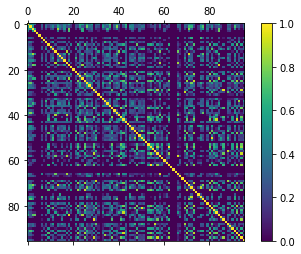

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

# ngrams = 2 
max features = 1000

In [64]:
vect = CountVectorizer(stop_words="english", analyzer='word', ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=1000)
X = vect.fit_transform(object_words)

In [65]:
count_df = DataFrame(X.A, columns=vect.get_feature_names())
#print (count_df)

In [66]:
count_ary = count_df.values
#print (count_ary)
correlation= 1-pairwise_distances(count_ary, metric='cosine')
print (correlation)

[[1.         0.30844355 0.34528979 ... 0.13829797 0.05664412 0.15799202]
 [0.30844355 1.         0.46861059 ... 0.17378825 0.04270814 0.17868261]
 [0.34528979 0.46861059 1.         ... 0.08754694 0.         0.10001389]
 ...
 [0.13829797 0.17378825 0.08754694 ... 1.         0.         0.22254605]
 [0.05664412 0.04270814 0.         ... 0.         1.         0.        ]
 [0.15799202 0.17868261 0.10001389 ... 0.22254605 0.         1.        ]]


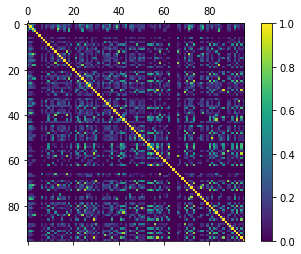

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

# ngrams = 3

max features = 10

In [60]:
vect = CountVectorizer(stop_words="english", analyzer='word', ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=1000)
X = vect.fit_transform(object_words)

In [68]:
count_df = DataFrame(X.A, columns=vect.get_feature_names())
#count_df

In [62]:
count_ary = count_df.values
#print (count_ary)
correlation= 1-pairwise_distances(count_ary, metric='cosine')
print (correlation)

[[1.         0.24130854 0.28726894 ... 0.10425721 0.04445542 0.12038585]
 [0.24130854 1.         0.40583972 ... 0.12858612 0.03289758 0.13363062]
 [0.28726894 0.40583972 1.         ... 0.06262243 0.         0.07231015]
 ...
 [0.10425721 0.12858612 0.06262243 ... 1.         0.         0.16037507]
 [0.04445542 0.03289758 0.         ... 0.         1.         0.        ]
 [0.12038585 0.13363062 0.07231015 ... 0.16037507 0.         1.        ]]


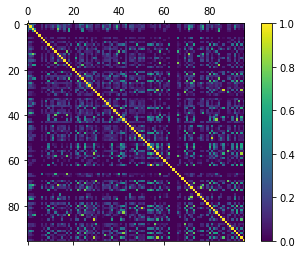

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

   airpla  airplane  arms  baby  baggage  baseball  bat  bathroom  bea  beach  \
0     0.0       0.0   0.0   0.0      0.0       0.0  0.0       0.0  0.0    0.0   
1     0.0       0.0   0.0   0.0      0.0       0.0  0.0       0.0  0.0    0.0   
2     0.0       0.0   0.0   0.0      0.0       0.0  0.0       0.0  0.0    0.0   
3     0.0       0.0   0.0   0.0      0.0       0.0  0.0       0.0  0.0    0.0   
4     0.0       0.0   0.0   0.0      0.0       0.0  0.0       0.0  0.0    0.0   

   ...    umbrella   walking  wat  water     white  wii  wine     woman  \
0  ...         0.0  0.000000  0.0    0.0  0.000000  0.0   0.0  0.000000   
1  ...         0.0  4.178054  0.0    0.0  0.000000  0.0   0.0  5.239818   
2  ...         0.0  0.000000  0.0    0.0  4.178054  0.0   0.0  2.619909   
3  ...         0.0  0.000000  0.0    0.0  0.000000  0.0   0.0  0.000000   
4  ...         0.0  0.000000  0.0    0.0  0.000000  0.0   0.0  0.000000   

   women  young  
0    0.0    0.0  
1    0.0    0.0  
2    0.0

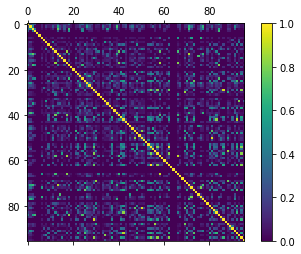

In [150]:
f = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, \
                    stop_words="english", analyzer='word', ngram_range=(1, 1), \
                    max_df=1.0, min_df=1, max_features=2000)
Xi = f.fit_transform(object_words)
tfid_df = DataFrame(Xi.A, columns=f.get_feature_names())
print (tfid_df.head())
tfid_ary = tfid_df.values
#print (tfid_ary)
correlation= 1-pairwise_distances(tfid_ary, metric='cosine')
#print (correlation)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

   airpla  airpla man  airplane  airplane runway  arms  arms young  baby  \
0     0.0         0.0       0.0              0.0   0.0         0.0   0.0   
1     0.0         0.0       0.0              0.0   0.0         0.0   0.0   
2     0.0         0.0       0.0              0.0   0.0         0.0   0.0   
3     0.0         0.0       0.0              0.0   0.0         0.0   0.0   
4     0.0         0.0       0.0              0.0   0.0         0.0   0.0   

   baby couple  baby man  baggage    ...      woman posing  woman sitting  \
0          0.0       0.0      0.0    ...               0.0            0.0   
1          0.0       0.0      0.0    ...               0.0            0.0   
2          0.0       0.0      0.0    ...               0.0            0.0   
3          0.0       0.0      0.0    ...               0.0            0.0   
4          0.0       0.0      0.0    ...               0.0            0.0   

   woman standing  woman white  women  women standing  young  young boys  \
0   

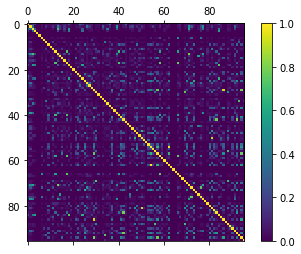

In [146]:
f = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, \
                    stop_words="english", analyzer='word', ngram_range=(1, 2), \
                    max_df=1.0, min_df=1, max_features=2000)
Xi = f.fit_transform(object_words)
tfid_df = DataFrame(Xi.A, columns=f.get_feature_names())
print (tfid_df.head())
tfid_ary = tfid_df.values
#print (tfid_ary)
correlation= 1-pairwise_distances(tfid_ary, metric='cosine')
#print (correlation)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

   airpla  airpla man  airpla man standing  airplane  airplane runway  \
0     0.0         0.0                  0.0       0.0              0.0   
1     0.0         0.0                  0.0       0.0              0.0   
2     0.0         0.0                  0.0       0.0              0.0   
3     0.0         0.0                  0.0       0.0              0.0   
4     0.0         0.0                  0.0       0.0              0.0   

   airplane runway man  arms  arms young  arms young girl  baby  \
0                  0.0   0.0         0.0              0.0   0.0   
1                  0.0   0.0         0.0              0.0   0.0   
2                  0.0   0.0         0.0              0.0   0.0   
3                  0.0   0.0         0.0              0.0   0.0   
4                  0.0   0.0         0.0              0.0   0.0   

         ...         women standing  women standing holding  \
0        ...                    0.0                     0.0   
1        ...                    

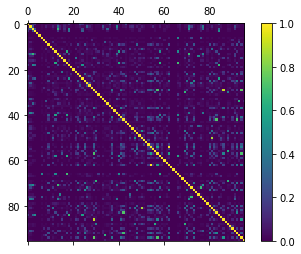

In [170]:
f = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, \
                    stop_words="english", analyzer='word', ngram_range=(1, 3), \
                    max_df=1.0, min_df=1, max_features=2000)
Xi = f.fit_transform(object_words)
tfid_df = DataFrame(Xi.A, columns=f.get_feature_names())
print (tfid_df.head())
tfid_ary = tfid_df.values
#print (tfid_ary)
correlation= 1-pairwise_distances(tfid_ary, metric='cosine')
#print (correlation)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

# Get the max best description
1. Get the words that are the best ngram words that describes the picture and the words that least describe the picture. 
2. Add the words to the original dataset.
3. Find the common words that describe the pictures with the likes in the second and third quadrant of likes. 

In [171]:
tfid_df = tfid_df.replace(0, np.NaN)
df_max_tfid = tfid_df.idxmax(axis=1)
#type(df_max_tfid)
df_max_tfid =df_max_tfid.to_frame("max_common_object")
df_min_tfid = tfid_df.idxmin(axis=1)
df_min_tfid =df_min_tfid.to_frame("min_common_object")



In [172]:
df_join = df.join(df_max_tfid)
df_join = df_join.join(df_min_tfid)

# Get the percentiles
1. Get the 2nd and 3rd percentiles for the likes.  
1. Put those into a new pickle database.

In [234]:
df_join['likes'] = df_join['likes'].astype('int64')
#print(df_join.dtypes)
desc = df_join.describe()
#print(desc)
second = desc.loc['25%'][0]
third = desc.loc['75%'][0]
print(second, third)

39838.0 76025.0


In [239]:
sql = "select *  from df_join \
where likes between " + str(second) + " and " + str(third)
df_join = sqldf(sql)

In [240]:
df_join.to_pickle("instagram_database_with_object.pickle")